In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

In [85]:
df =pd.read_csv("train.csv")
df.drop("id",axis=1,inplace = True)

In [86]:
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
2,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
3,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
4,Russian Researchers Discover Secret Nazi Milit...,Amando Flavio,The mystery surrounding The Third Reich and Na...,1


In [87]:
print(f"Our Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Our Dataset has 17181 rows and 4 columns


# Checking Null Values

In [89]:
df.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

# Dropping Null Values

In [90]:
df = df.dropna()

In [91]:
print(f"After dropping null values our Dataset now has {df.shape[0]} rows and {df.shape[1]} columns")

After dropping null values our Dataset now has 17181 rows and 4 columns


# Checking if there is "white space" in our "text" column instead of text

In [92]:
df[df["text"].str.isspace()]

,title,author,text,label


In [93]:
# We will find the "white space" using the pandas DataFrame.str.isspace() method. The "~" notation means just the opposite values

In [94]:
df = df[~df["text"].str.isspace()]

In [95]:
df["text"].apply(lambda x:x=="").sum()

0

In [96]:
df[df["title"].str.isspace()]

,title,author,text,label


# Taking a look at our final DataSet after feature engineering 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17181 entries, 0 to 17180
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   17181 non-null  object
 1   author  17181 non-null  object
 2   text    17181 non-null  object
 3   label   17181 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 671.1+ KB


# Top 20 words used that are catagoried as 'Fake News"

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words ="english")
matrix =count_vect.fit_transform(df[df["label"]==0]["text"])
frequency = zip(count_vect.get_feature_names(),matrix.sum(axis =0).tolist()[0])
print(sorted(frequency,key =lambda x:-x[1])[:20])

[('said', 60818), ('mr', 57816), ('trump', 31567), ('new', 17373), ('people', 17366), ('president', 14937), ('like', 13830), ('ms', 11222), ('time', 10336), ('state', 10180), ('just', 10006), ('years', 9888), ('states', 9735), ('year', 9087), ('united', 8988), ('news', 8282), ('did', 8088), ('american', 7943), ('government', 7723), ('house', 7362)]


# Top 20 words used that are catagoried as 'Real News"

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words ="english")
matrix =count_vect.fit_transform(df[df["label"]==1]["text"])
frequency = zip(count_vect.get_feature_names(),matrix.sum(axis =0).tolist()[0])
print(sorted(frequency,key =lambda x:-x[1])[:20])

[('trump', 16653), ('clinton', 16017), ('people', 12705), ('hillary', 10696), ('said', 9045), ('new', 8248), ('like', 7986), ('just', 7942), ('time', 7283), ('world', 7273), ('2016', 6948), ('state', 6946), ('election', 6811), ('president', 6650), ('government', 6425), ('obama', 6225), ('war', 6000), ('american', 5679), ('media', 5347), ('states', 5128)]


# Taking our "feature column" and "Label Column"

In [101]:
X = df["text"]
y = df["label"]

In [102]:
from sklearn.model_selection import train_test_split

# Splitting our data for training and testing the models

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Creating a PipeLine to first vectorize then apply machine learning model  

### Model_1: Support Vector Classifier

In [105]:
pipe = Pipeline([("tfidf",TfidfVectorizer(stop_words="english")),("svc",LinearSVC())])

In [106]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())])

# Finding our predictions and error metrics

In [107]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [108]:
y_preds = pipe.predict(X_test)

In [109]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1844
           1       0.96      0.97      0.96      1593

    accuracy                           0.96      3437
   macro avg       0.96      0.96      0.96      3437
weighted avg       0.96      0.96      0.96      3437



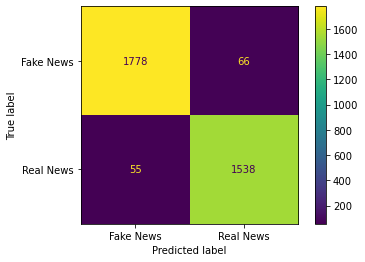

In [110]:
plot_confusion_matrix(pipe,X_test,y_test,display_labels=["Fake News","Real News"])

### Model_2: Naive Bayes Algorithmn

In [111]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
pipe2 = Pipeline([("tfidf",TfidfVectorizer(stop_words="english")),("nb",MultinomialNB())])

In [113]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [114]:
y_preds = pipe2.predict(X_test)

In [115]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1844
           1       0.99      0.60      0.75      1593

    accuracy                           0.81      3437
   macro avg       0.87      0.80      0.80      3437
weighted avg       0.86      0.81      0.80      3437



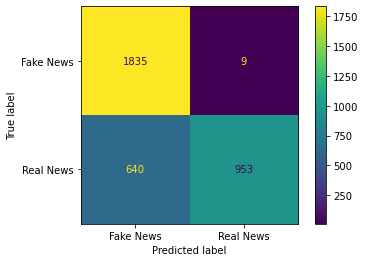

In [116]:
plot_confusion_matrix(pipe2,X_test,y_test,display_labels=["Fake News","Real News"])

### Model_3: PassiveAgressive Classifier


In [117]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [118]:
pipe3 = Pipeline([("tfidf",TfidfVectorizer(stop_words="english")),("pa",PassiveAggressiveClassifier())])

In [119]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('pa', PassiveAggressiveClassifier())])

In [120]:
y_preds = pipe3.predict(X_test)

In [121]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1844
           1       0.96      0.96      0.96      1593

    accuracy                           0.96      3437
   macro avg       0.96      0.96      0.96      3437
weighted avg       0.96      0.96      0.96      3437



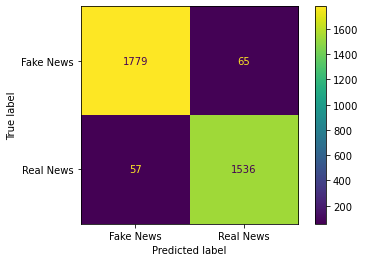

In [122]:
plot_confusion_matrix(pipe3,X_test,y_test,display_labels=["Fake News","Real News"])

# Launching the Model

In [123]:
y = y.map({0:"Fake News",1:"Real News"})

In [124]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC())])

# Testing new text

In [125]:
pipe.predict(["Donald Trump is the 45th president of the USA"])

array(['Real News'], dtype=object)

In [126]:
pipe.predict(["Obama was a great president"])

array(['Real News'], dtype=object)

In [127]:
pipe.predict(["Hillary Clinton was a great president"])

array(['Real News'], dtype=object)